### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\3578213224.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Loading data

In [2]:
data = pd.read_csv('train.csv')
X_test = pd.read_csv("test.csv")

In [3]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Extracting feature variables and target variable

In [4]:
data_y = data['label'].values
data_x = data.drop('label',axis=1)

In [5]:
data_x.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data visualization

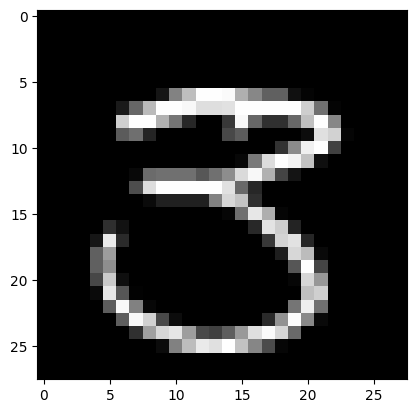

In [9]:
img = data_x.iloc[7].values.reshape((28,28))
plt.imshow(img,cmap='gray')

In [10]:
set(data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [11]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size = 0.1, random_state=42)

### Model Building

In [12]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


### Model training

In [14]:
model.fit(X_train, y_train, batch_size=264, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
144/144 [==============================] - 2s 3ms/step - loss: 2.9357 - accuracy: 0.8032 - val_loss: 0.8325 - val_accuracy: 0.8705
Epoch 2/5
144/144 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.9110 - val_loss: 0.5327 - val_accuracy: 0.9076
Epoch 3/5
144/144 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.9396 - val_loss: 0.4796 - val_accuracy: 0.9176
Epoch 4/5
144/144 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.9552 - val_loss: 0.3854 - val_accuracy: 0.9300
Epoch 5/5
144/144 [==============================] - 0s 3ms/step - loss: 0.1205 - accuracy: 0.9668 - val_loss: 0.3663 - val_accuracy: 0.9276


### Model evaluation

In [15]:
model.predict(X_test).argmax(axis=1)

875/875 [==============================] - 1s 1ms/step


array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

875/875 [==============================] - 1s 881us/step
The predicted label is: 0


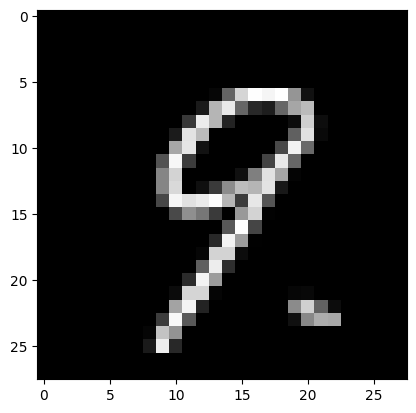

In [17]:
img = X_test.iloc[2].values.reshape((28,28))
plt.imshow(img,cmap='gray')
print("The predicted label is:" ,model.predict(X_test).argmax(axis=1)[1])

Further ahead: You can try increasing the model layers and play with the hyperparameters to increase model's performance